# Proyecto: Producción no convencional de petróleo y gas en Argentina
## Notebook 2: Limpieza y preparación de los datos
### Objetivo de la notebook:
Preparar el conjunto de datos que se utilizarán en la etapa de modelado. Incluye la limpieza de los datos, combinarlos con otro dataset y transformarlos en variables más útiles (feature engineering). 

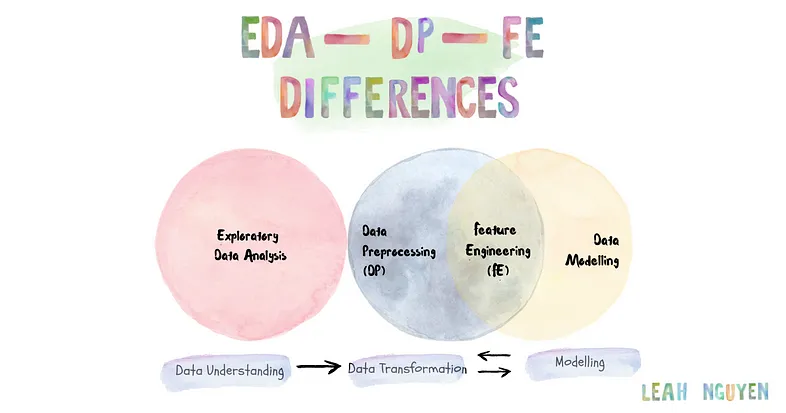

In [74]:
#importar librerías
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Ignorar todos los warnings
import warnings

warnings.filterwarnings('ignore')


## PREPROCESAMIENTO DEL DATASET DE POZOS

In [3]:
#Lectura del archivo .csv y guardado con el nombre "pozos"
pozos= pd.read_csv('../Data/pozos.csv',delimiter=',',encoding='utf-8')
pozos

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,156805,136.914,1240.232,166.78,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.858318,-39.007369,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2016,1,135209,29.080,617.770,32.28,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.849834,-39.020619,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
2,YSUR,2018,1,158256,271.874,307.871,115.57,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.823235,-39.011761,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2016,1,134010,51.350,378.650,11.50,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.862415,-39.022839,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2016-01-31
4,YSUR,2018,1,131068,0.000,0.000,0.00,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.878573,-39.009753,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


In [4]:
# Obtenemos el resumen del dataset
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271670 entries, 0 to 271669
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idempresa               271670 non-null  object 
 1   anio                    271670 non-null  int64  
 2   mes                     271670 non-null  int64  
 3   idpozo                  271670 non-null  int64  
 4   prod_pet                271670 non-null  float64
 5   prod_gas                271670 non-null  float64
 6   prod_agua               271670 non-null  float64
 7   iny_agua                271670 non-null  float64
 8   iny_gas                 271670 non-null  float64
 9   iny_co2                 271670 non-null  float64
 10  iny_otro                271670 non-null  float64
 11  tef                     271670 non-null  float64
 12  vida_util               5758 non-null    float64
 13  tipoextraccion          271127 non-null  object 
 14  tipoestado          

#### 1- Seleccionar las variables de interés 

In [5]:
#Generamos un nuevo dataframe con las variables de interés
pozos_selecc = pozos[['anio','mes','idpozo','prod_pet','prod_gas','prod_agua','coordenadax','coordenaday',
                      'provincia','cuenca','empresa','formacion','sigla','profundidad']]
pozos_selecc

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,coordenadax,coordenaday,provincia,cuenca,empresa,formacion,sigla,profundidad
0,2018,1,156805,136.914000,1240.232000,166.780000,-67.858318,-39.007369,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YSR.RN.EFO-154(d),3878.0
1,2016,1,135209,29.080000,617.770000,32.280000,-67.849834,-39.020619,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-132(d),3940.0
2,2018,1,158256,271.874000,307.871000,115.570000,-67.823235,-39.011761,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YEA.RN.EFO-308(d),4411.0
3,2016,1,134010,51.350000,378.650000,11.500000,-67.862415,-39.022839,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-109(d),3883.0
4,2018,1,131068,0.000000,0.000000,0.000000,-67.878573,-39.009753,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,AEA.RN.EFO-45ST,3816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271665,2023,8,146101,0.000000,0.000000,0.000000,-67.963790,-38.460750,Rio Negro,NEUQUINA,Petrolera Aconcagua Energia S.A.,tordillo,PEL.RN.JQ.e-2,3780.0
271666,2023,9,146101,0.000000,0.000000,0.000000,-67.963790,-38.460750,Rio Negro,NEUQUINA,Petrolera Aconcagua Energia S.A.,tordillo,PEL.RN.JQ.e-2,3780.0
271667,2023,9,164503,240.171667,2006.971943,312.904842,-68.085408,-38.211980,Rio Negro,NEUQUINA,Petrolera Aconcagua Energia S.A.,punta rosada,ACO.RN.CB.xp-2008(d),2858.0
271668,2023,9,164374,297.101504,3217.431504,4.941691,-68.106619,-38.178494,Rio Negro,NEUQUINA,Petrolera Aconcagua Energia S.A.,punta rosada,ACO.RN.CB-2003,2840.0


#### 2 - Identificar y manejar los valores nulos 

In [14]:
#valores nulos
valores_faltantes = pozos_filtro.isnull().sum().sort_values(ascending = False) 
# contabiliza datos nulos y los ordena de mayor a menor según la columna
valores_faltantes

anio           0
mes            0
idpozo         0
prod_pet       0
prod_gas       0
prod_agua      0
coordenadax    0
coordenaday    0
provincia      0
empresa        0
formacion      0
sigla          0
profundidad    0
dtype: int64

Text(0.5, 1.0, 'Valores faltantes')

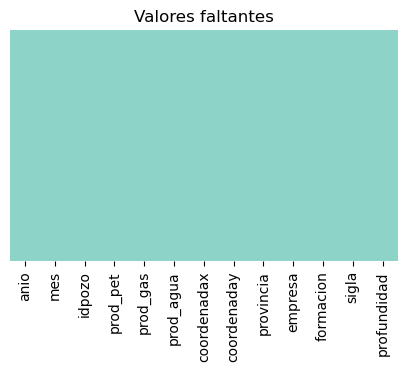

In [18]:
#Representación gráfica de los valores faltantes
plt.rcParams['figure.figsize'] = (5,3)
sns.heatmap(pozos_filtro.isnull(),yticklabels = False, cbar = False , cmap = 'Set3')
plt.title("Valores faltantes")

#### 3-Manejar duplicados

In [19]:
# Identificar duplicados
pozos_filtro.duplicated().values.any()

False

In [20]:
pozos_filtro.duplicated().sum().sum()

0

#### 4- Manejar valores atípicos (outliers)


Utilizamos técnicas de visualización de datos para inspeccionar la distribución de los datos y verificar la presencia de valores atípicos:

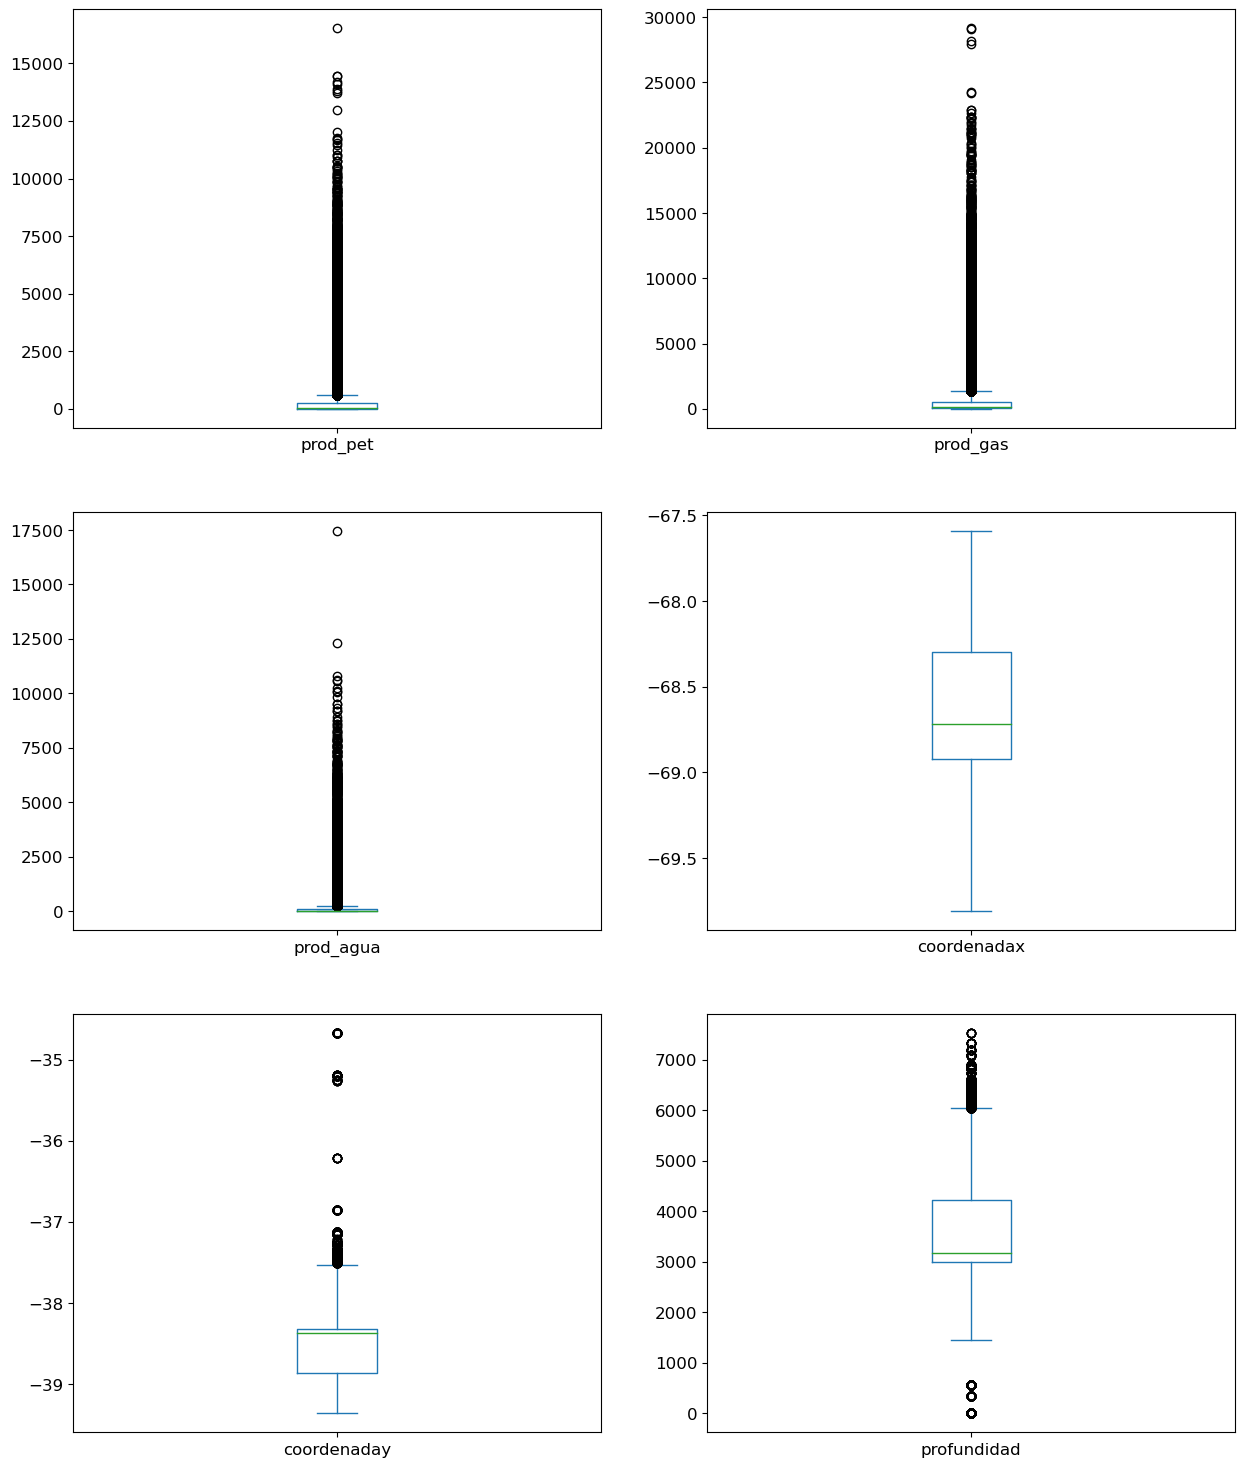

In [23]:
#Distribución de las variables sin normalizar
plt= pozos_filtro[['prod_pet','prod_gas','prod_agua',
                   'coordenadax','coordenaday','profundidad']].plot(kind= 'box' , subplots=True, layout=(4,2), sharex=False, sharey=False,fontsize=12,figsize=(15,25))

Al visualizar las diferentes distribuciones, parecería que la dispersión es una característica propia de los datos de producción. Probablemente la única manera de ver una distribución simétrica es trabajando a nivel de pozo. 


In [28]:
#En primer lugar sacamos valores extremos que no suman al análisis,o que claramente se debe a un error de carga
pozos_filtro = pozos_selecc[(pozos_selecc['anio'] >= 2009) & 
                            (pozos_selecc['anio'] <=2022) &
                            (pozos_selecc['prod_pet'] >= 1)&
                            (pozos_selecc['prod_gas'] >= 1)&
                            (pozos_selecc['coordenadax'] <= -55)&
                            (pozos_selecc['coordenaday'] >= -58)&
                            (pozos_selecc['profundidad'] < 378939)&
                            (pozos_selecc['cuenca'] == 'NEUQUINA')]
pozos_filtro 

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,coordenadax,coordenaday,provincia,cuenca,empresa,formacion,sigla,profundidad
0,2018,1,156805,136.914,1240.232,166.78,-67.858318,-39.007369,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YSR.RN.EFO-154(d),3878.00
1,2016,1,135209,29.080,617.770,32.28,-67.849834,-39.020619,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-132(d),3940.00
2,2018,1,158256,271.874,307.871,115.57,-67.823235,-39.011761,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YEA.RN.EFO-308(d),4411.00
3,2016,1,134010,51.350,378.650,11.50,-67.862415,-39.022839,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-109(d),3883.00
5,2016,1,134775,15.920,216.800,17.28,-67.850698,-39.016700,Rio Negro,NEUQUINA,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-113(d),3835.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271581,2013,12,145752,451.300,139.300,916.10,-69.140577,-37.280617,Neuquén,NEUQUINA,AMERICAS PETROGAS ARGENTINA S.A.,vaca muerta,AME.Nq.ADA.x-01,3448.00
271586,2014,1,146275,2.340,3.969,875.00,-69.751561,-38.796329,Neuquén,NEUQUINA,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,2190.00
271589,2014,2,146275,62.780,39.924,334.28,-69.751561,-38.796329,Neuquén,NEUQUINA,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,2190.00
271597,2014,3,146275,5.880,13.347,46.00,-69.751561,-38.796329,Neuquén,NEUQUINA,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,2190.00


In [29]:
# Luego eliminamos la variable cuenca ya que al filtrarla por cuenca Neuquina no tiene sentido seguirla manteniendo
pozos_filtro= pozos_filtro.drop(labels = ['cuenca'], axis = 1)
pozos_filtro

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,coordenadax,coordenaday,provincia,empresa,formacion,sigla,profundidad
0,2018,1,156805,136.914,1240.232,166.78,-67.858318,-39.007369,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YSR.RN.EFO-154(d),3878.00
1,2016,1,135209,29.080,617.770,32.28,-67.849834,-39.020619,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-132(d),3940.00
2,2018,1,158256,271.874,307.871,115.57,-67.823235,-39.011761,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YEA.RN.EFO-308(d),4411.00
3,2016,1,134010,51.350,378.650,11.50,-67.862415,-39.022839,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-109(d),3883.00
5,2016,1,134775,15.920,216.800,17.28,-67.850698,-39.016700,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-113(d),3835.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271581,2013,12,145752,451.300,139.300,916.10,-69.140577,-37.280617,Neuquén,AMERICAS PETROGAS ARGENTINA S.A.,vaca muerta,AME.Nq.ADA.x-01,3448.00
271586,2014,1,146275,2.340,3.969,875.00,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,2190.00
271589,2014,2,146275,62.780,39.924,334.28,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,2190.00
271597,2014,3,146275,5.880,13.347,46.00,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,2190.00


In [37]:
#Leemos el shapefile correspondiente a las provincias de Argentina para poder contextualizar la ubicación de los pozos
geo_provincias = gpd.read_file('../shapefiles/provincia.shp')

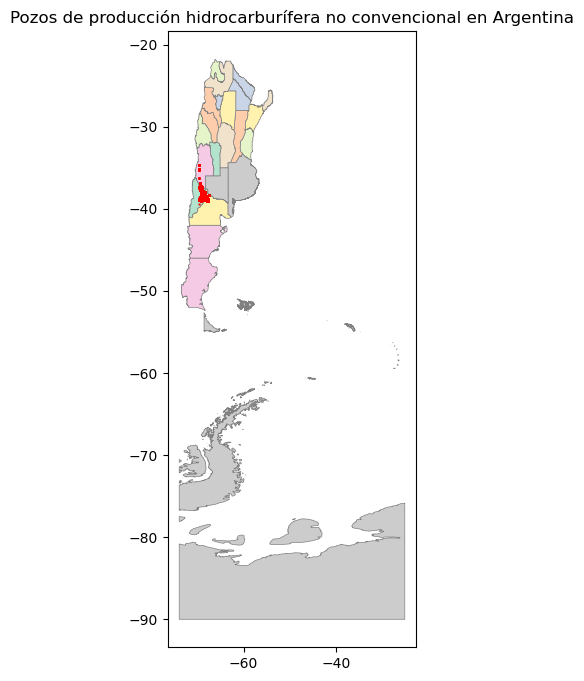

In [38]:
# Mapeamos los pozos hidrocarburíferos sobre la capa de provincias
fig, ax = plt.subplots(figsize=(10,8))
geo_provincias.plot( ax= ax, cmap='Pastel2', edgecolor='grey',linewidth = 0.5)
plt.scatter(pozos_filtro.coordenadax, pozos_filtro.coordenaday,c = 'red', marker = 'p',s = 0.5)
plt.title('Pozos de producción hidrocarburífera no convencional en Argentina')
plt.show();

In [35]:
#Creamos un geodataframe a partir de las coordenadas geográficas del dataset de pozos
geo_pozos = gpd.GeoDataFrame(pozos_filtro, geometry=gpd.points_from_xy(pozos_filtro.coordenadax, pozos_filtro.coordenaday), crs="EPSG:4326")

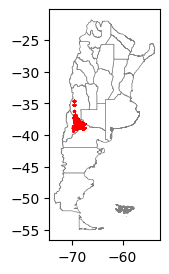

In [36]:
#Restringimos la representación a la parte continental de la República Argentina
ax = geo_provincias.clip([-80, -55, -50, -20]).plot(color="white", edgecolor='grey',linewidth = 0.5)

# Mapeamos los pozos de la cuenca Neuquina
geo_pozos.plot(ax=ax,c = 'red', marker = 'p', markersize=2)

plt.show()

Verificamos que mantuvimos únicamente los pozos correspondientes a la cuenca Neuquina

In [39]:
# Una vez que verificamos haber eliminado las columnas y valores que no son de nuestro interés,
# vemos con cuantos datos nos quedamos
pozos_filtro.shape

(132613, 13)

In [40]:
#Veamos la relación de registros de interés pertenecientes a la cuenca neuquina
cant_registros_Neuquina = pozos_filtro.shape[0]
cant_registros_original = pozos.shape[0]
(cant_registros_Neuquina/cant_registros_original)*100

48.81400228218059

Al filtrar las variables de interés, conservamos el 49% de los datos del dataset original

In [41]:
#Generamos un resumen estadístico del dataset
pozos_filtro.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,coordenadax,coordenaday,profundidad
count,132613.000000,132613.000000,132613.000000,132613.000000,132613.000000,132613.000000,132613.000000,132613.000000,132613.000000
mean,2018.407494,6.684737,148890.464065,367.547163,676.354076,166.282888,-68.674984,-38.520858,3583.087169
std,2.942212,3.445051,18451.443670,894.672267,1527.898092,494.402812,0.442791,0.341245,1107.509884
min,2009.000000,1.000000,3640.000000,1.000000,1.000000,0.000000,-69.809002,-39.358320,0.000000
25%,2016.000000,4.000000,145739.000000,13.350000,44.553594,4.030000,-68.920054,-38.856464,3002.000000
50%,2019.000000,7.000000,154556.000000,53.650000,163.150000,23.090000,-68.718683,-38.372059,3179.000000
75%,2021.000000,10.000000,158239.000000,243.050000,564.790000,97.800000,-68.299153,-38.320100,4221.000000
max,2022.000000,12.000000,163905.000000,16513.300000,29129.660000,17468.160000,-67.588498,-34.669110,7535.000000


<Axes: xlabel='prod_pet', ylabel='prod_gas'>

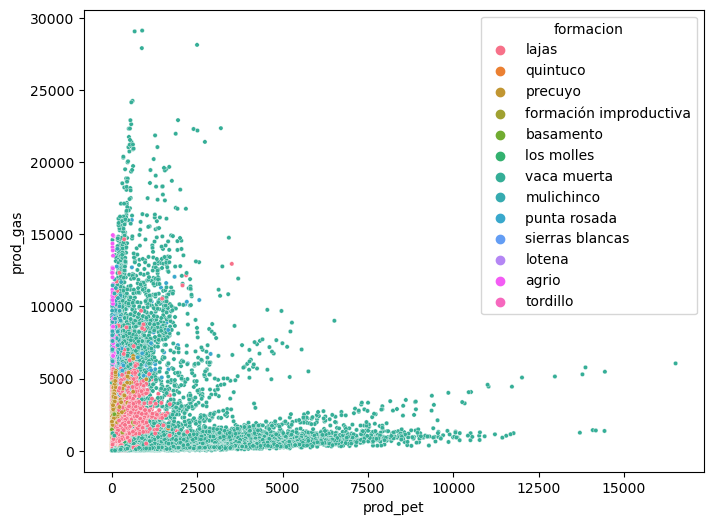

In [42]:
#Graficamos las producciones de petróleo y gas para verificar que la dispersión se debe a la diversidad de áreas en que se realiza la explotación 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pozos_filtro, x='prod_pet', y='prod_gas', hue='formacion', s= 10)

In [ ]:
 #Graficamos las producciones de petróleo y gas, por provincia y formación, para verificar que la dispersión se debe a la diversidad de áreas en que se realiza la explotación 
sns.lmplot(
data=pozos_filtro, x='prod_pet', y='prod_gas', hue='formacion',  palette='Set2',
col='provincia', row='formacion', 
scatter_kws={"s": 4},height=4, aspect=1, facet_kws=dict( sharex=False, sharey=False))

# save the plot as PNG file
plt.savefig("seaborn_lmplot_formacxprov.png")

# save the plot as JPG file
plt.savefig("seaborn_lmplot_formacxprov.jpg", dpi=300)
    

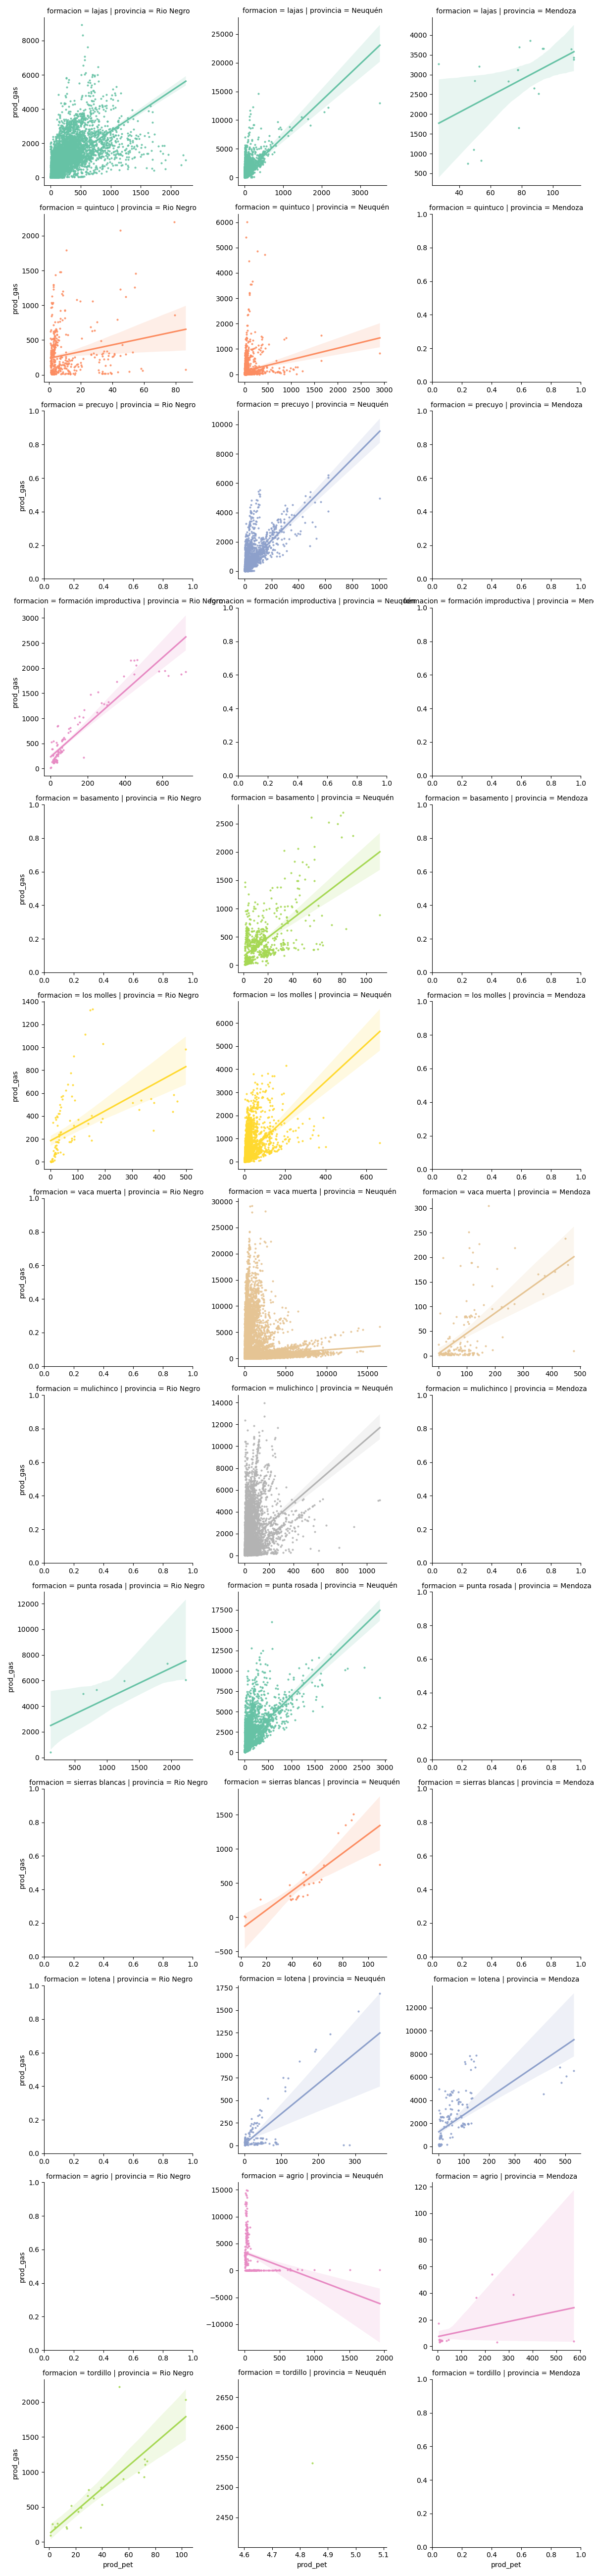

Dado que igualmente las variables filtradas tienen una distribución asimétrica, en lugar de utilizar  z-score podemos utilizar el rango intercuartil (IQR) para evaluar los valores atípicos.

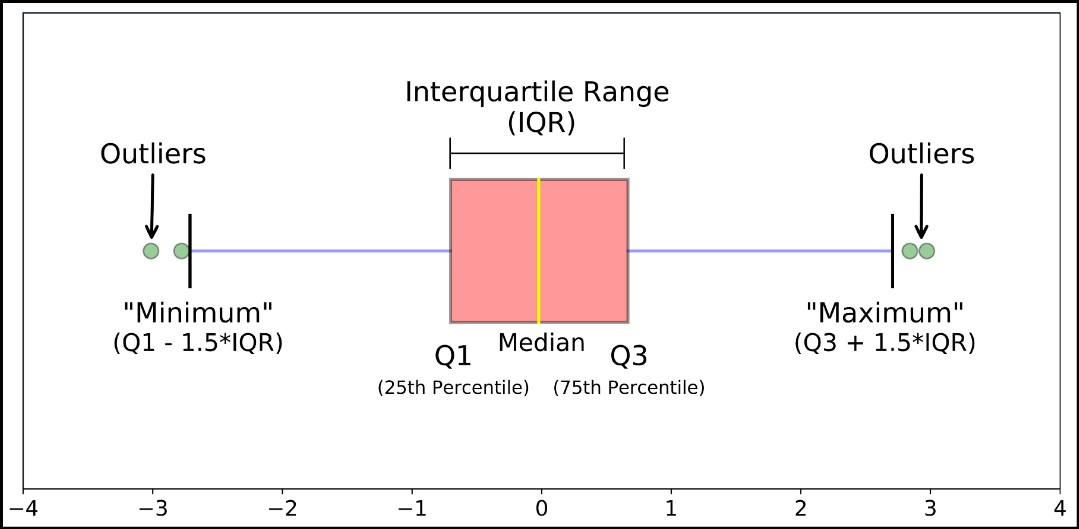

In [45]:
#creamos una función para identificar los outliers usando el método del IQR

def find_outliers_IQR(pozos_filtro):

   q1=pozos_filtro.quantile(0.25 ,numeric_only=True)

   q3=pozos_filtro.quantile(0.75,numeric_only=True)

   IQR=q3-q1

   outliers = pozos_filtro[((pozos_filtro<(q1-1.5*IQR)) | (pozos_filtro>(q3+1.5*IQR)))]

   return outliers

In [46]:
outliers = find_outliers_IQR(pozos_filtro)

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 132613
max outlier value: anio                NaN
mes                 NaN
idpozo         126816.0
prod_pet        16513.3
prod_gas       29129.66
prod_agua      17468.16
coordenadax         NaN
coordenaday   -34.66911
provincia          None
empresa            None
formacion          None
sigla              None
profundidad      7535.0
dtype: object
min outlier value: anio                NaN
mes                 NaN
idpozo           3640.0
prod_pet         587.61
prod_gas        1345.15
prod_agua      238.4741
coordenadax         NaN
coordenaday    -37.5103
provincia          None
empresa            None
formacion          None
sigla              None
profundidad         0.0
dtype: object


,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,coordenadax,coordenaday,provincia,empresa,formacion,sigla,profundidad
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271581,NaN,NaN,NaN,NaN,NaN,916.10,NaN,-37.280617,NaN,NaN,NaN,NaN,NaN
271586,NaN,NaN,NaN,NaN,NaN,875.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271589,NaN,NaN,NaN,NaN,NaN,334.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5- Escalar/Normalizar los datos

La normalización consiste en ajustar los valores que existen en diferentes escalas a una escala común, lo que permite compararlos más fácilmente. Esto es especialmente importante al crear modelos de aprendizaje automático, ya que permita asegurarnos de que la distribución de los valores de una columna no quede sobrerrepresentada o subrepresentada en los modelos.

In [53]:
#importamos el escalador MinMaxScaler de sklearn.preprocessing
scaler = MinMaxScaler()

#realizamos una copia del dataframe
pozos_filtro_escalado =pozos_filtro.copy()

#usamos el escalador para ajustar y transformar las columnas numéricas
pozos_filtro_escalado[['prod_pet', 'prod_gas', 'prod_agua','profundidad']] = scaler.fit_transform(pozos_filtro_escalado[['prod_pet', 'prod_gas', 'prod_agua', 'profundidad']])

pozos_filtro_escalado

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,coordenadax,coordenaday,provincia,empresa,formacion,sigla,profundidad
0,2018,1,156805,0.008231,0.042543,0.009548,-67.858318,-39.007369,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YSR.RN.EFO-154(d),0.514665
1,2016,1,135209,0.001701,0.021174,0.001848,-67.849834,-39.020619,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-132(d),0.522893
2,2018,1,158256,0.016404,0.010535,0.006616,-67.823235,-39.011761,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YEA.RN.EFO-308(d),0.585401
3,2016,1,134010,0.003049,0.012965,0.000658,-67.862415,-39.022839,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-109(d),0.515328
5,2016,1,134775,0.000904,0.007409,0.000989,-67.850698,-39.016700,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-113(d),0.509082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271581,2013,12,145752,0.027271,0.004748,0.052444,-69.140577,-37.280617,Neuquén,AMERICAS PETROGAS ARGENTINA S.A.,vaca muerta,AME.Nq.ADA.x-01,0.457598
271586,2014,1,146275,0.000081,0.000102,0.050091,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,0.290644
271589,2014,2,146275,0.003741,0.001336,0.019137,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,0.290644
271597,2014,3,146275,0.000296,0.000424,0.002633,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,0.290644


#### 6- Estandarizar los datos

El método de z-score a menudo se denomina estandarización y transforma los datos en una distribución de valores donde la media es 0 y tiene una desviación estándar de 1.

In [54]:
#importamos el escalador MinMaxScaler de sklearn.preprocessing
scaler = StandardScaler()

#realizamos una copia del dataframe
pozos_filtro_normaliz =pozos_filtro.copy()

#usamos el escalador para ajustar y transformar las columnas numéricas
pozos_filtro_normaliz[['prod_pet', 'prod_gas', 'prod_agua', 'profundidad']] = scaler.fit_transform(pozos_filtro_normaliz[['prod_pet', 'prod_gas', 'prod_agua', 'profundidad']])

pozos_filtro_normaliz

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,coordenadax,coordenaday,provincia,empresa,formacion,sigla,profundidad
0,2018,1,156805,-0.257786,0.369056,0.001005,-67.858318,-39.007369,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YSR.RN.EFO-154(d),0.266286
1,2016,1,135209,-0.378316,-0.038343,-0.271041,-67.849834,-39.020619,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-132(d),0.322267
2,2018,1,158256,-0.106937,-0.241171,-0.102574,-67.823235,-39.011761,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,YEA.RN.EFO-308(d),0.747547
3,2016,1,134010,-0.353424,-0.194846,-0.313072,-67.862415,-39.022839,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-109(d),0.270800
5,2016,1,134775,-0.393025,-0.300776,-0.301381,-67.850698,-39.016700,Rio Negro,YSUR ENERGÍA ARGENTINA S.R.L.,lajas,APA.RN.EFO-113(d),0.228299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271581,2013,12,145752,0.093613,-0.351500,1.516617,-69.140577,-37.280617,Neuquén,AMERICAS PETROGAS ARGENTINA S.A.,vaca muerta,AME.Nq.ADA.x-01,-0.121974
271586,2014,1,146275,-0.408204,-0.440074,1.433487,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,-1.257860
271589,2014,2,146275,-0.340648,-0.416541,0.339799,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,-1.257860
271597,2014,3,146275,-0.404247,-0.433936,-0.243290,-69.751561,-38.796329,Neuquén,ARGENTA ENERGIA S.A.,vaca muerta,ARG.Nq.Cvo.x-2,-1.257860


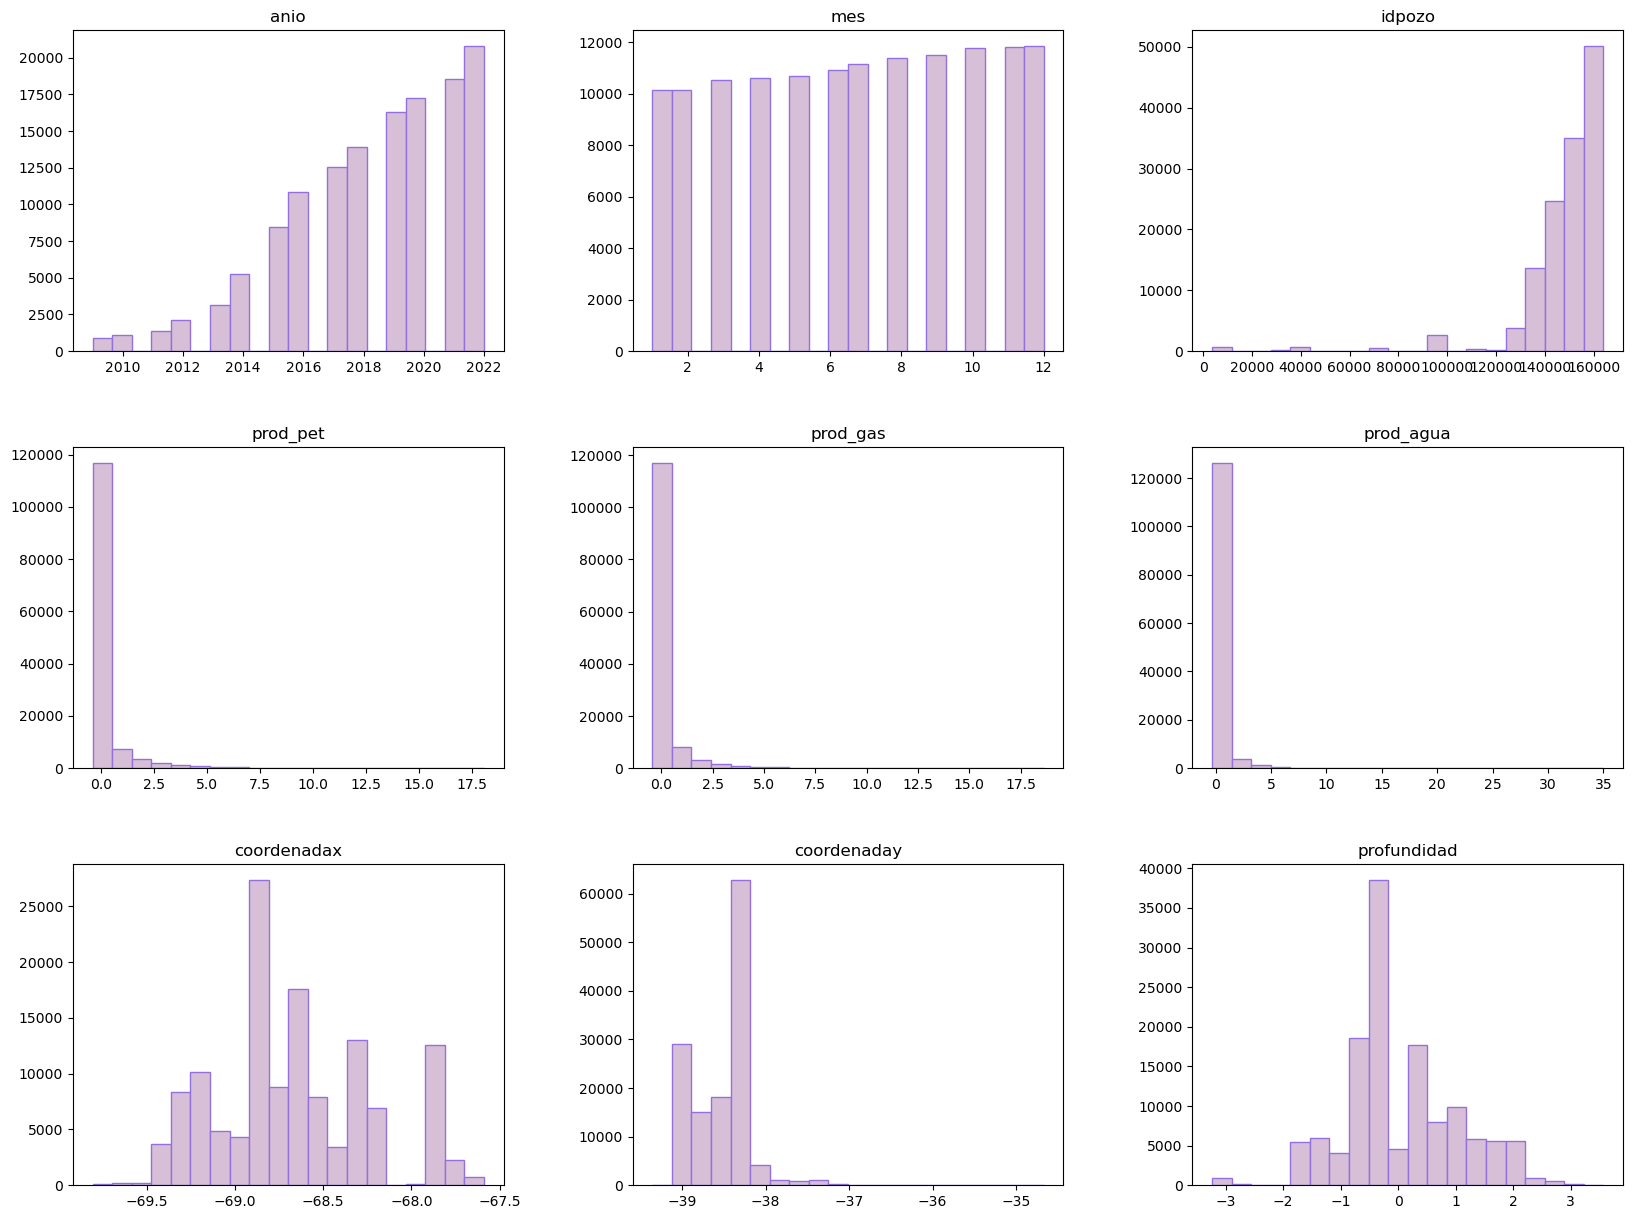

In [55]:
hist=pozos_filtro_normaliz.hist(bins=20, figsize=(20, 15),grid=False,  color = "thistle", ec="mediumpurple", lw=1)

No hay un cambio en las distribución de las variables debido al escalado o la normalización, al menos visualmente. Seguramente sí desde el punto de vista de performance del modelado. 

#### 7- Renombrar Columnas
No fue necesario


#### 8- Corregir tipos de datos
No fue necesario

#### 9- Encodear variables
Esta etapa se deberá evaluar para cada modelo (supervisado vs. no supervisado) 
La codificación de variables convierte las variables categóricas en variables numéricas para que los datos sean compatibles con los modelos de aprendizaje automático. Hay varias formas de realizar la codificación de funciones:

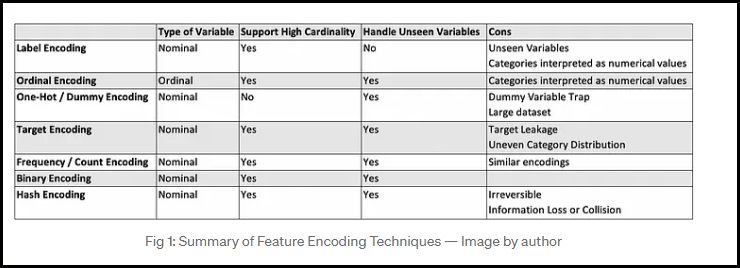

In [58]:
#Antes de guardar volvemos a verificar la presencia de valores nulos
#Obtenemos el total de valores nulos en todo el dataframe
print(pozos_filtro_escalado.isnull().sum().sum())
print(pozos_filtro_normaliz.isnull().sum().sum())

0
0


In [59]:
#Guardar la versión del dataset luego del preprocesamiento, escalado
#Agregamos index = False para evitar la creación de la columna ‘Unnamed:0’.
pozos_filtro_escalado.to_csv('pozos_filtro_escalado.csv',index = False)

In [60]:
#Guardar la versión del dataset luego del preprocesamiento, normalizado
#Agregamos index = False para evitar la creación de la columna ‘Unnamed:0’.
pozos_filtro_normaliz.to_csv('pozos_filtro_normaliz.csv',index = False)

# ---------------------------------------------------------------------------------------------------------------

## PREPROCESAMIENTO DEL DATASET DE FRACTURAS

In [61]:
#Lectura del archivo .csv y guardado con el nombre "fracturas"
fracturas = pd.read_csv('fracturas.csv')
fracturas

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,...,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio
0,30,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.,4,2019
1,31,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.,11,2018
2,37,159219,YPF.Nq.AdlA-1001(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
3,38,159220,YPF.Nq.AdlA-1002(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
4,39,159221,YPF.Nq.AdlA-1003(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,4253,164653,YPF.Nq.LCav-113(h),NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3830.0,...,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.,7,2023
3577,4254,164654,YPF.Nq.LCav-114(h),NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3638.0,...,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.,7,2023
3578,4255,164456,PLU.Nq.LCa-3098(h),NEUQUINA,LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2587.0,...,2023-10-24 12:37:12.445477,2023,9,2023,10,2023,10,PLUSPETROL S.A.,9,2023
3579,4256,164528,PLU.Nq.LCa-3099(h),NEUQUINA,LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2654.0,...,2023-10-24 12:39:58.392624,2023,9,2023,10,2023,10,PLUSPETROL S.A.,9,2023


In [62]:
#Generamos un nuevo dataframe con las variables de interés
fracturas_selecc = fracturas[['anio','mes','idpozo','cuenca', 'sigla', 
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante']]
fracturas_selecc

,anio,mes,idpozo,cuenca,sigla,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,longitud_rama_horizontal_m,...,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante
0,2019,4,159910,NEUQUINA,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,0.0,...,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.
1,2018,11,159910,NEUQUINA,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,0.0,...,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.
2,2017,11,159219,NEUQUINA,YPF.Nq.AdlA-1001(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,1437.3,...,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
3,2017,11,159220,NEUQUINA,YPF.Nq.AdlA-1002(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,1518.3,...,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
4,2017,11,159221,NEUQUINA,YPF.Nq.AdlA-1003(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,1482.3,...,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,2023,7,164653,NEUQUINA,YPF.Nq.LCav-113(h),BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,3830.0,...,2023-07-10,2023-08-08,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.
3577,2023,7,164654,NEUQUINA,YPF.Nq.LCav-114(h),BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,3638.0,...,2023-07-12,2023-08-07,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.
3578,2023,9,164456,NEUQUINA,PLU.Nq.LCa-3098(h),LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,2587.0,...,2023-09-18,2023-10-13,2023-10-24 12:37:12.445477,2023,9,2023,10,2023,10,PLUSPETROL S.A.
3579,2023,9,164528,NEUQUINA,PLU.Nq.LCa-3099(h),LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,2654.0,...,2023-09-18,2023-10-13,2023-10-24 12:39:58.392624,2023,9,2023,10,2023,10,PLUSPETROL S.A.


In [63]:
#Filtramos el dataset según umbrales de interés
fracturas_filtro = fracturas_selecc[(fracturas_selecc['anio'] >= 2009) & 
                            (fracturas_selecc['anio'] <=2022) &
                            (fracturas_selecc['tipo_reservorio'] =='NO CONVENCIONAL') &
                            (fracturas_selecc['cuenca'] == 'NEUQUINA')]
fracturas_filtro 

,anio,mes,idpozo,cuenca,sigla,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,longitud_rama_horizontal_m,...,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante
0,2019,4,159910,NEUQUINA,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,0.0,...,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.
1,2018,11,159910,NEUQUINA,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,0.0,...,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.
2,2017,11,159219,NEUQUINA,YPF.Nq.AdlA-1001(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,1437.3,...,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
3,2017,11,159220,NEUQUINA,YPF.Nq.AdlA-1002(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,1518.3,...,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
4,2017,11,159221,NEUQUINA,YPF.Nq.AdlA-1003(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,1482.3,...,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,2022,8,163626,NEUQUINA,KIL.Nq.MMo-1030(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,1896.0,...,2022-08-25,2022-09-11,2023-09-26 16:07:25.629207,2022,8,2022,9,2023,9,KILWER S.A.
3552,2022,8,163627,NEUQUINA,KIL.Nq.MMo-1031(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,1910.0,...,2022-08-24,2022-09-10,2023-09-26 16:08:35.124861,2022,8,2022,9,2023,9,KILWER S.A.
3553,2022,10,163793,NEUQUINA,KIL.Nq.MMo-1038(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,2037.0,...,2022-10-15,2022-10-26,2023-09-26 16:10:00.850808,2022,10,2022,10,2023,9,KILWER S.A.
3554,2022,10,163794,NEUQUINA,KIL.Nq.MMo-1039(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,1687.0,...,2022-10-15,2022-10-24,2023-09-26 16:12:00.93711,2022,10,2022,10,2023,9,KILWER S.A.


In [64]:
# Eliminar variable cuenca ya que al filtrarla por cuenca Neuquina no tiene sentido seguirla manteniendo, lo mismo con el tipo de reservorio
#Ya que todos corresponden a explotaciones no convencionales
fracturas_filtro= fracturas_filtro.drop(labels = ['cuenca','tipo_reservorio'], axis = 1)
fracturas_filtro

,anio,mes,idpozo,sigla,areapermisoconcesion,yacimiento,formacion_productiva,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,...,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante
0,2019,4,159910,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,0.0,3,Punzado,...,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.
1,2018,11,159910,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,0.0,1,Punzado,...,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.
2,2017,11,159219,YPF.Nq.AdlA-1001(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,1437.3,18,Tapón disparo,...,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
3,2017,11,159220,YPF.Nq.AdlA-1002(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,1518.3,19,Tapón disparo,...,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
4,2017,11,159221,YPF.Nq.AdlA-1003(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,1482.3,19,Tapón disparo,...,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,2022,8,163626,KIL.Nq.MMo-1030(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,1896.0,29,Tapón disparo,...,2022-08-25,2022-09-11,2023-09-26 16:07:25.629207,2022,8,2022,9,2023,9,KILWER S.A.
3552,2022,8,163627,KIL.Nq.MMo-1031(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,1910.0,29,Tapón disparo,...,2022-08-24,2022-09-10,2023-09-26 16:08:35.124861,2022,8,2022,9,2023,9,KILWER S.A.
3553,2022,10,163793,KIL.Nq.MMo-1038(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,2037.0,31,Tapón disparo,...,2022-10-15,2022-10-26,2023-09-26 16:10:00.850808,2022,10,2022,10,2023,9,KILWER S.A.
3554,2022,10,163794,KIL.Nq.MMo-1039(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,1687.0,26,Tapón disparo,...,2022-10-15,2022-10-24,2023-09-26 16:12:00.93711,2022,10,2022,10,2023,9,KILWER S.A.


In [65]:
# Obtenemos las columnas numéricas del dataset
fracturas_num = fracturas.select_dtypes(include='number')
fracturas_num.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga', 'mes',
       'anio'],
      dtype='object')

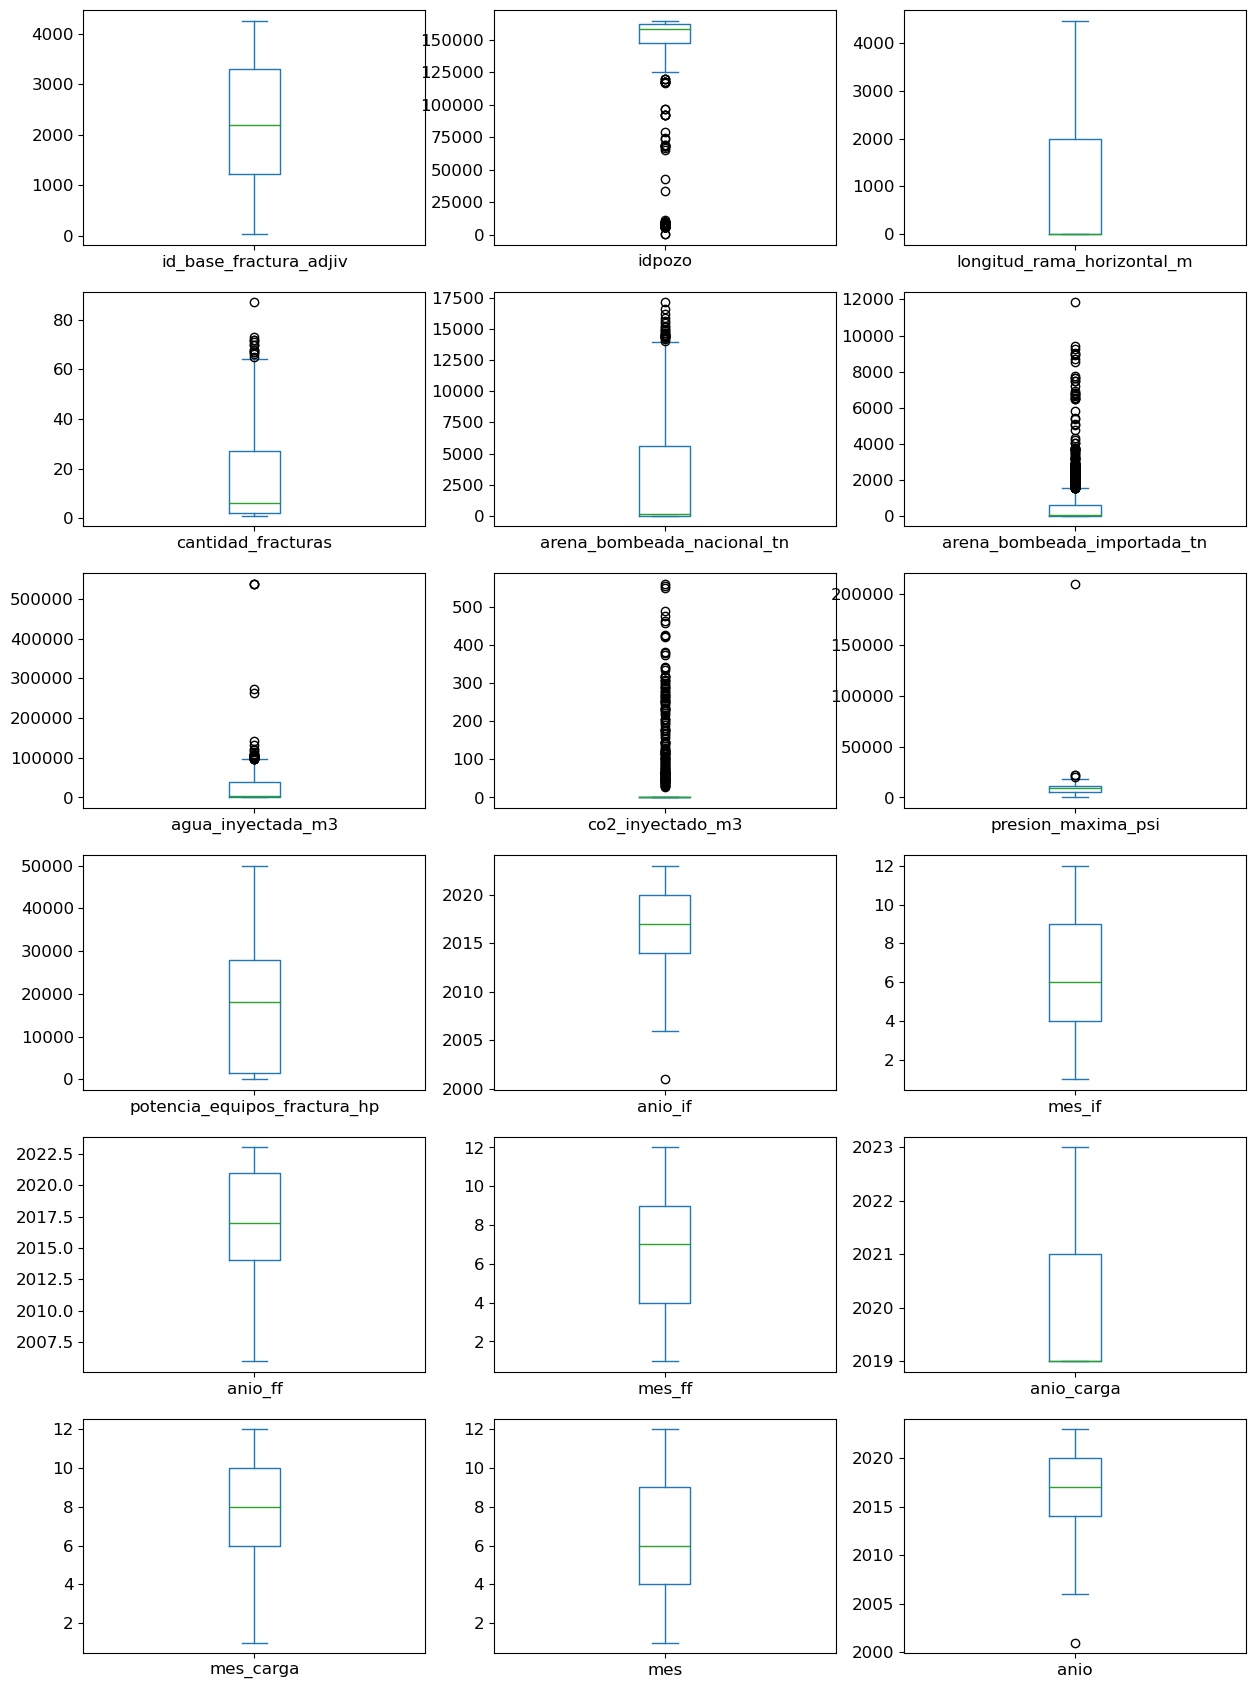

In [66]:
#vemos la distribución de las variables del dataset fltrado 
plt= fracturas[['id_base_fractura_adjiv', 'idpozo', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga', 'mes',
       'anio']].plot(kind= 'box' , subplots=True, layout=(7,3), sharex=False, sharey=False,fontsize=12,figsize=(15,25))

Distribuciones algo más uniformes que las de los pozos, y con menor dispersión de los outliers

In [67]:
#Escalamos las variables numéricas de interés del dataset de fracturas
#importamos el escalador MinMaxScaler de sklearn.preprocessing
scaler = MinMaxScaler()

#realizamos una copia del dataframe
fracturas_filtro_escalado =fracturas_filtro.copy()

#usamos el escalador para ajustar y transformar las columnas numéricas
fracturas_filtro_escalado[['longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp']] = scaler.fit_transform(fracturas_filtro_escalado[['longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp']])

fracturas_filtro_escalado

,anio,mes,idpozo,sigla,areapermisoconcesion,yacimiento,formacion_productiva,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,...,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante
0,2019,4,159910,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,0.000000,0.028169,Punzado,...,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.
1,2018,11,159910,APS.Nq.ADC.xp-1033,AGUA DEL CAJON,AGUA DEL CAJON,los molles,0.000000,0.000000,Punzado,...,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.
2,2017,11,159219,YPF.Nq.AdlA-1001(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,0.321041,0.239437,Tapón disparo,...,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
3,2017,11,159220,YPF.Nq.AdlA-1002(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,0.339133,0.253521,Tapón disparo,...,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
4,2017,11,159221,YPF.Nq.AdlA-1003(h),AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,0.331092,0.253521,Tapón disparo,...,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,2022,8,163626,KIL.Nq.MMo-1030(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,0.423498,0.394366,Tapón disparo,...,2022-08-25,2022-09-11,2023-09-26 16:07:25.629207,2022,8,2022,9,2023,9,KILWER S.A.
3552,2022,8,163627,KIL.Nq.MMo-1031(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,0.426625,0.394366,Tapón disparo,...,2022-08-24,2022-09-10,2023-09-26 16:08:35.124861,2022,8,2022,9,2023,9,KILWER S.A.
3553,2022,10,163793,KIL.Nq.MMo-1038(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,0.454992,0.422535,Tapón disparo,...,2022-10-15,2022-10-26,2023-09-26 16:10:00.850808,2022,10,2022,10,2023,9,KILWER S.A.
3554,2022,10,163794,KIL.Nq.MMo-1039(h),MATA MORA NORTE,MATA MORA NORTE,vaca muerta,0.376815,0.352113,Tapón disparo,...,2022-10-15,2022-10-24,2023-09-26 16:12:00.93711,2022,10,2022,10,2023,9,KILWER S.A.


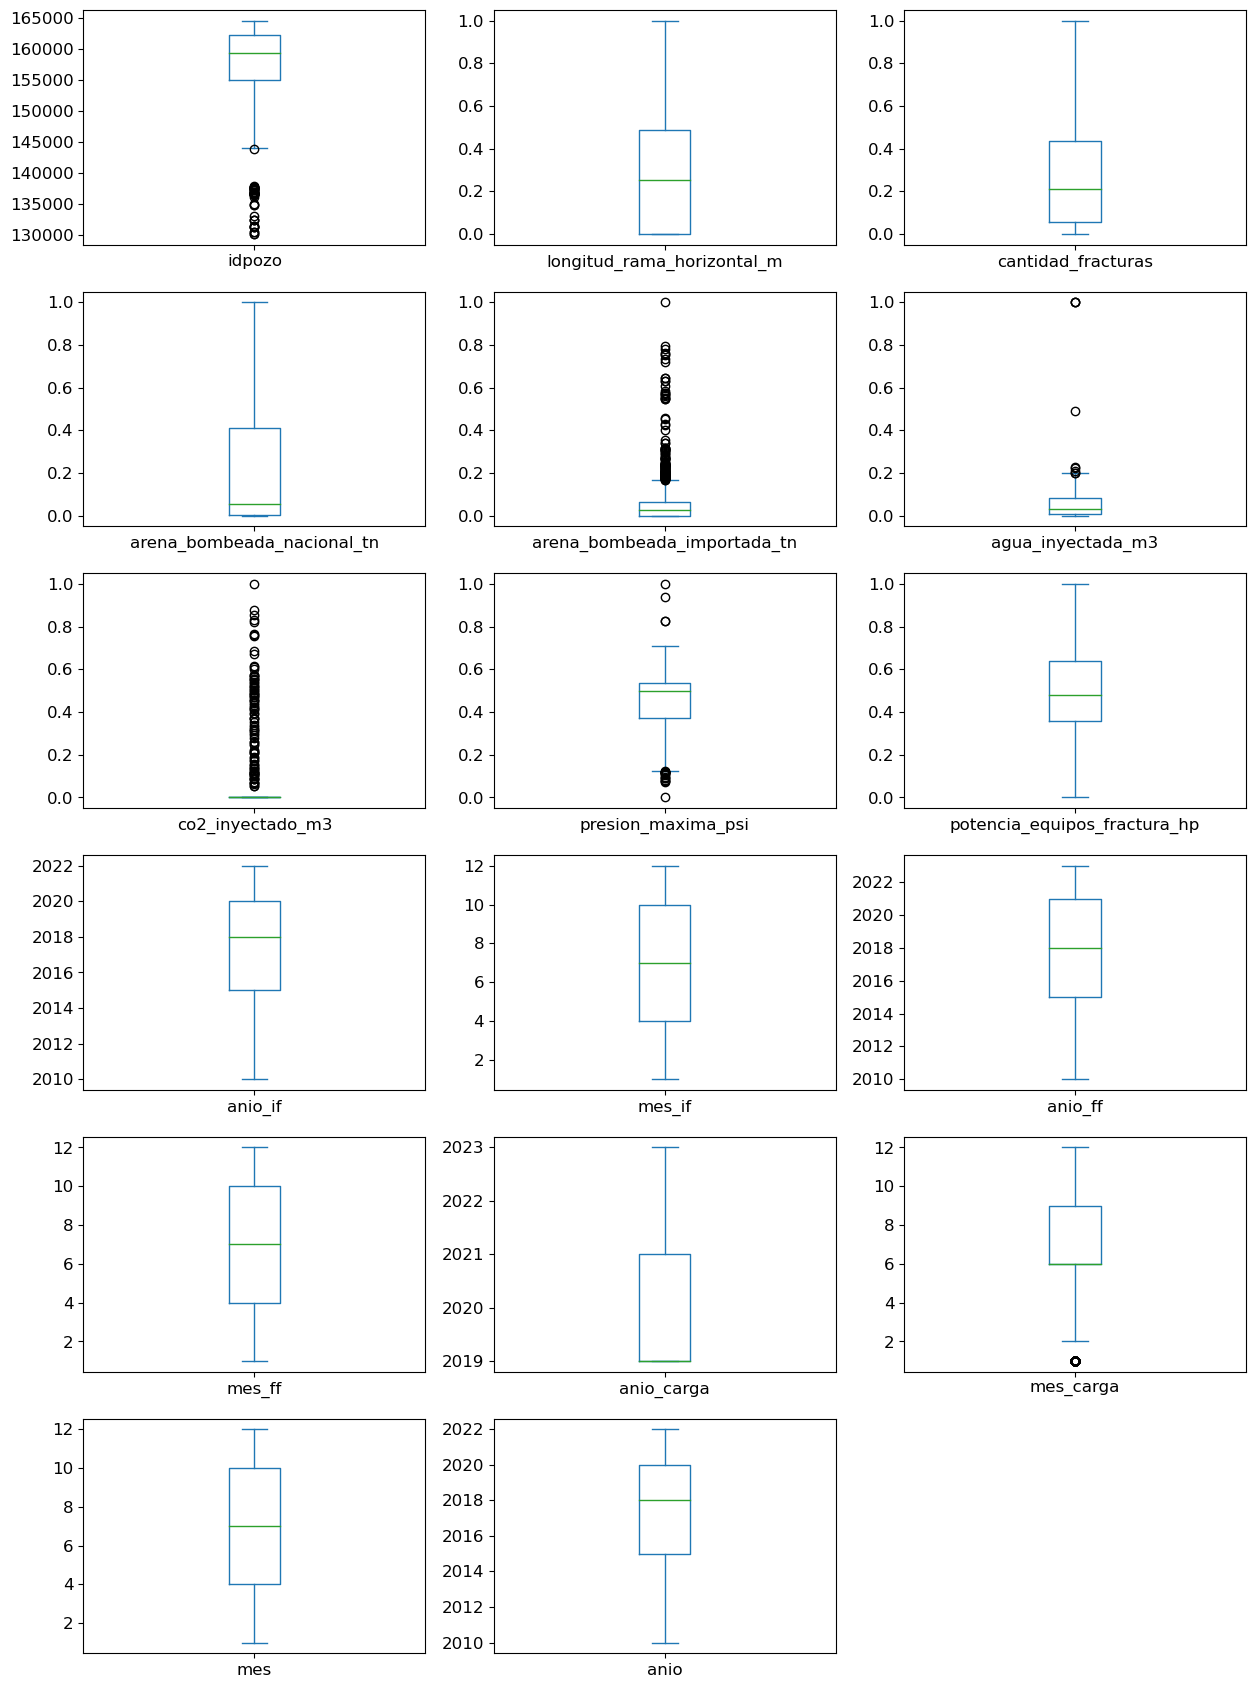

In [68]:
plt= fracturas_filtro_escalado[[ 'idpozo', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga', 'mes',
       'anio']].plot(kind= 'box' , subplots=True, layout=(7,3), sharex=False, sharey=False,fontsize=12,figsize=(15,25))

In [69]:
#valores nulos
valores_faltantes = fracturas_filtro_escalado.isnull().sum().sort_values(ascending = False) 
# contabiliza datos nulos y los ordena de mayor a menor según la columna
valores_faltantes

potencia_equipos_fractura_hp    35
anio                             0
mes                              0
mes_carga                        0
anio_carga                       0
mes_ff                           0
anio_ff                          0
mes_if                           0
anio_if                          0
fecha_data                       0
fecha_fin_fractura               0
fecha_inicio_fractura            0
presion_maxima_psi               0
co2_inyectado_m3                 0
agua_inyectada_m3                0
arena_bombeada_importada_tn      0
arena_bombeada_nacional_tn       0
tipo_terminacion                 0
cantidad_fracturas               0
longitud_rama_horizontal_m       0
formacion_productiva             0
yacimiento                       0
areapermisoconcesion             0
sigla                            0
idpozo                           0
empresa_informante               0
dtype: int64

In [70]:
#Relleno los datos faltantes de potencia_equipos_fractura_hp con la mediana ya que en el box plot de sus valores escalados tiene una distribución bastante uniforme
fracturas_filtro_escalado['potencia_equipos_fractura_hp'] = fracturas_filtro_escalado['potencia_equipos_fractura_hp'].fillna(fracturas_filtro_escalado['potencia_equipos_fractura_hp'].median())

In [71]:
#Verificar que no hayan quedado valores nulos luego de la imputación
#valores nulos
valores_faltantes = fracturas_filtro_escalado.isnull().sum().sort_values(ascending = False) 
# contabiliza datos nulos y los ordena de mayor a menor según la columna
valores_faltantes

anio                            0
mes                             0
mes_carga                       0
anio_carga                      0
mes_ff                          0
anio_ff                         0
mes_if                          0
anio_if                         0
fecha_data                      0
fecha_fin_fractura              0
fecha_inicio_fractura           0
potencia_equipos_fractura_hp    0
presion_maxima_psi              0
co2_inyectado_m3                0
agua_inyectada_m3               0
arena_bombeada_importada_tn     0
arena_bombeada_nacional_tn      0
tipo_terminacion                0
cantidad_fracturas              0
longitud_rama_horizontal_m      0
formacion_productiva            0
yacimiento                      0
areapermisoconcesion            0
sigla                           0
idpozo                          0
empresa_informante              0
dtype: int64

Text(0.5, 1.0, 'Valores faltantes')

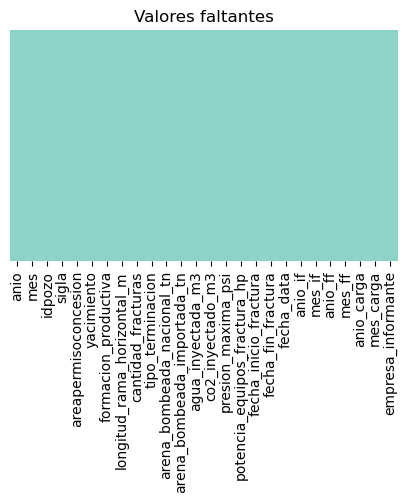

In [75]:
#Representación gráfica de los valores faltantes luego de la imputación
plt.rcParams['figure.figsize'] = (5,3)
sns.heatmap(fracturas_filtro_escalado.isnull(),yticklabels = False, cbar = False , cmap = 'Set3')
plt.title("Valores faltantes")

# --------------------------------------------------------------------------------------------------------------